# Home Exercise: Kaggle Housing Prices - Data Preparation and Model Training 
## Objective 
Your task is to prepare the Kaggle Housing Prices dataset for machine learning and train a Random Forest model to predict housing prices. This exercise will help you understand how to handle categorical data, deal with missing values, and manage outliers in a real-world dataset. 
## Dataset 
The dataset (train.csv and test.csv) can be downloaded from the Kaggle Housing Prices Competition page. It contains various features related to houses and their sale prices. 

## Tasks 
### 1. Data Loading and Inspection
- Load the training dataset from train.csv.
- Inspect the data types of each column, focusing on distinguishing between categorical and numerical columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
%matplotlib inline
%load_ext autoreload

In [2]:
# Read CSV to Pandas DataFrame and display top 5 rows
train_data = pd.read_csv(
    r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Data\home-data-for-ml-course\train.csv'
    )
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
column_types = train_data.dtypes.to_frame()
column_types.columns = ['type']
column_types.reset_index()
column_types.value_counts()

type   
object     43
int64      35
float64     3
Name: count, dtype: int64

### 2. Handle Missing Values
- Check for missing values in both categorical and numerical columns.
- Impute missing values using appropriate strategies: 
    1. For numerical columns, use the median value. 
    2. For categorical columns, use the most frequent value (mode).

In [4]:
# Stage 2: Handle Missing Values
# Imputing missing values for numerical and categorical data
for col in train_data.columns:
    if train_data[col].isnull().any():
        imputer = SimpleImputer(strategy='median' if train_data[col].dtype in ['int64', 'float64'] else 'most_frequent')
        train_data[[col]] = imputer.fit_transform(train_data[[col]])

train_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

### 3. Encode Categorical Variables
- Identify categorical variables in the dataset.
- Apply One-Hot Encoding to these categorical variables to convert them into a format suitable for machine learning models. 

In [5]:
# Stage 1: Encode Categorical Variables
categorical_cols = [col for col in train_data.columns if train_data[col].dtype == 'object']
numerical_cols = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64']]

onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_vars = onehot_encoder.fit_transform(train_data[categorical_cols])
encoded_vars_df = pd.DataFrame(encoded_vars, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded variables
train_data = train_data.drop(categorical_cols, axis=1)
train_data = pd.concat([train_data, encoded_vars_df], axis=1)

### 4. Deal with Outliers
- Focus on the 'LotArea' feature for outlier analysis.
- Calculate the Interquartile Range (IQR) and identify outliers.
- Remove data points that are significantly higher or lower than the calculated upper and lower bounds.

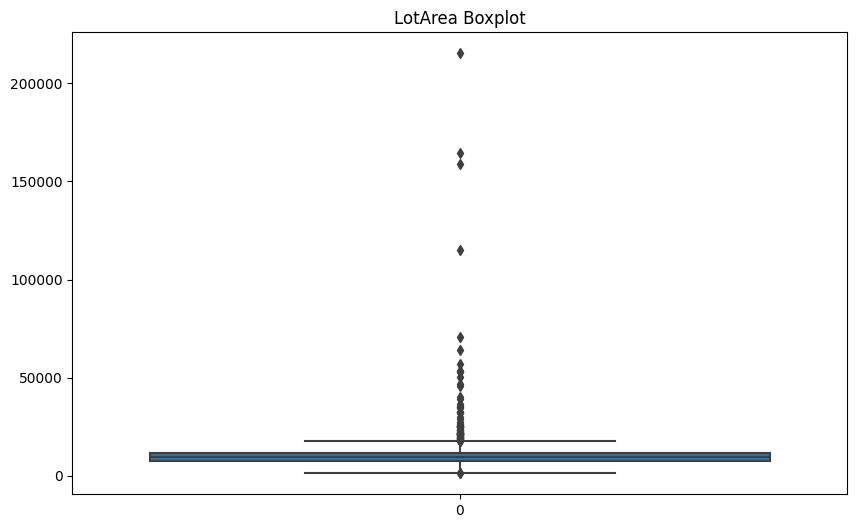

In [6]:
plt.figure(figsize=(10, 6))
plt.title("LotArea Boxplot")
sns.boxplot(data=train_data['LotArea'])
plt.show()

In [7]:
# Stage 3: Deal with Outliers in 'LotArea'
Q1 = train_data['LotArea'].quantile(0.25)
Q3 = train_data['LotArea'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
train_data = train_data[(train_data['LotArea'] >= lower_bound) & (train_data['LotArea'] <= upper_bound)]

### 5. Model Training
- Prepare the dataset for training a Random Forest model by dropping the target variable 'SalePrice' and any identifiers like 'Id'.
- Train a Random Forest Regressor on the cleaned dataset. 

In [8]:
# Preparing data for Random Forest model
X = train_data.drop(['SalePrice', 'Id'], axis=1)
y = train_data['SalePrice']

In [9]:
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X, y)

RandomForestRegressor(random_state=0)

### 6. Prepare the Test Data and Make Predictions
- Load the test dataset from test.csv.
- Apply the same preprocessing steps to the test data (encoding, imputation, and aligning columns).
- Use the trained Random Forest model to make predictions on the test set. 

In [10]:
# Load the test data
test_data = pd.read_csv(
    r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Data\home-data-for-ml-course\test.csv'
    )

# Keep a copy of the original to use later in Kaggle submission
test_data_original = test_data.copy()

In [11]:
# Stage 2: Handle Missing Values
# Imputing missing values for numerical and categorical data
for col in test_data.columns:
    if test_data[col].isnull().any():
        imputer = SimpleImputer(strategy='median' if test_data[col].dtype in ['int64', 'float64'] else 'most_frequent')
        test_data[[col]] = imputer.fit_transform(test_data[[col]])

train_data.isnull().any().sum()

0

In [12]:
# One Hot Encoding
test_encoded_vars = onehot_encoder.transform(test_data[categorical_cols])
test_encoded_vars_df = pd.DataFrame(test_encoded_vars, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded variables
test_data = test_data.drop(categorical_cols, axis=1)
test_data = pd.concat([test_data, test_encoded_vars_df], axis=1)
test_data = test_data.drop('Id', axis=1)

In [13]:
predictions = model.predict(test_data)

### 7. Prepare Submission File
- Create a submission file with predictions, formatted according to Kaggle's submission requirements. 

In [14]:
# Prepare submission file
submission = pd.DataFrame({
    'Id': test_data_original['Id'],
    'SalePrice': predictions
})

# Save submission file
submission.to_csv('submission_jordan_preprocessing.csv', index=False)

### 8. Submit your file
- Use the submit prediction button to submit the file in the kaggle competition page, what was the score?

Score: 0.14806

In [16]:
from ipynb_converter import convert_ipynb_to_pdf

convert_ipynb_to_pdf(
    source_file_path=
    r"C:\Users\jorda\Documents\studies\DScourse\Homework\meeting_18_short_and_useful_exercise_jordan.ipynb",
    output_directory=
    r"C:\Users\jorda\Documents\studies\DScourse\Homework\PDF",
    )

Converted to PDF:  C:\Users\jorda\Documents\studies\DScourse\Homework\PDF\meeting_18_short_and_useful_exercise_jordan.pdf
